    Classify the email using the binary classification method. Email Spam detection has two 
    states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and 
    Support Vector Machine for classification. Analyze their performance. 
    Dataset link: The emails.csv dataset on the Kaggle 
    https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv 

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
df= pd.read_csv('emails.csv')

In [264]:
df.shape

(5172, 3002)

In [265]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [266]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [267]:
df.info

<bound method DataFrame.info of        Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrast

In [268]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [269]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [270]:
#input data
x= df.drop(['Email No.','Prediction'],axis=1)

#Output Data
y= df['Prediction']
  

In [271]:
import seaborn as sns

<Axes: xlabel='Prediction', ylabel='count'>

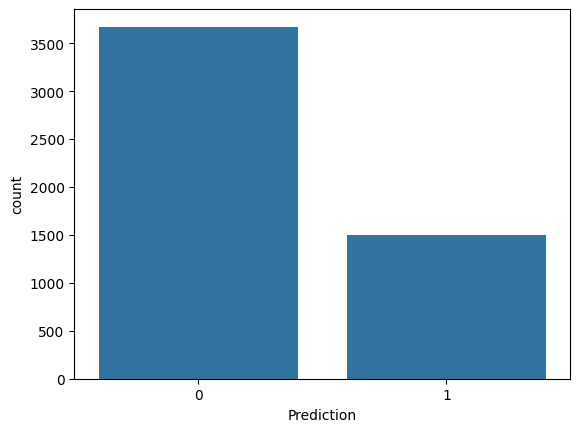

In [272]:
sns.countplot(x=y)

In [273]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [274]:
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [275]:
#Cross-Validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x_scaled,y,random_state=0,test_size=0.25
)

KNN

In [276]:
#import the class 
from sklearn.neighbors import KNeighborsClassifier

In [277]:
#Create the Object 
knn = KNeighborsClassifier(n_neighbors=10)

In [278]:
#Train the algorithm
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [279]:
#Predict on test data
y_pred=knn.predict(x_test)

In [280]:
#Import the evaluation matrix
from sklearn.metrics import ( ConfusionMatrixDisplay,
    accuracy_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    classification_report)

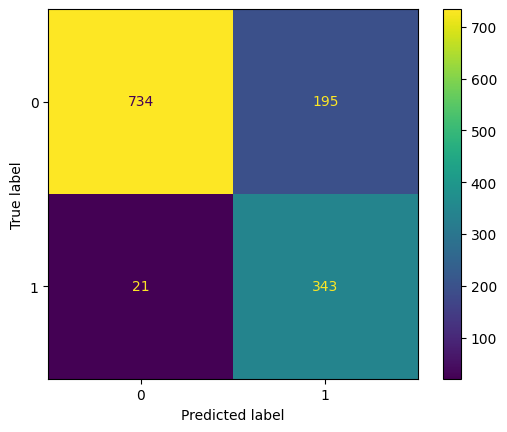

In [281]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

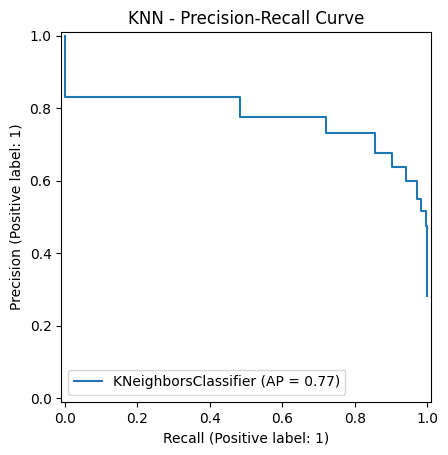

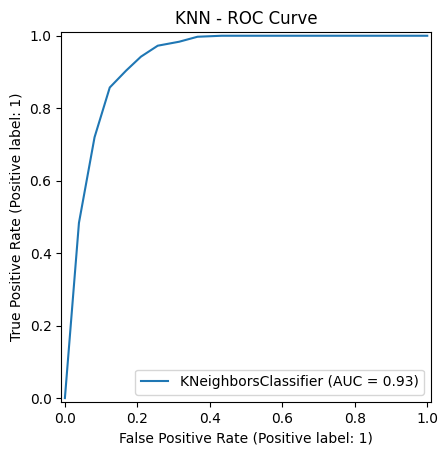

In [282]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(knn, x_test, y_test)
plt.title("KNN - Precision-Recall Curve")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(knn, x_test, y_test)
plt.title("KNN - ROC Curve")
plt.show()

In [283]:
accuracy_score(y_test,y_pred)

0.8329466357308585

In [284]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       929
           1       0.64      0.94      0.76       364

    accuracy                           0.83      1293
   macro avg       0.80      0.87      0.82      1293
weighted avg       0.88      0.83      0.84      1293



SVM

In [285]:
from sklearn.svm import SVC

In [286]:
svm = SVC(kernel='linear')

In [287]:
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [288]:
y_pred=svm.predict(x_test)

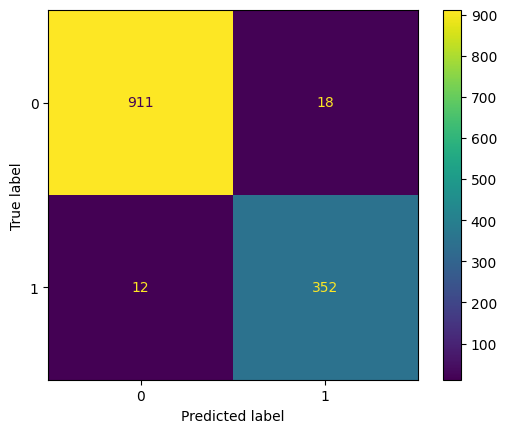

In [289]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

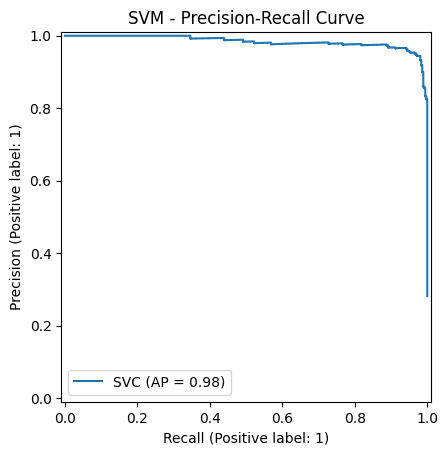

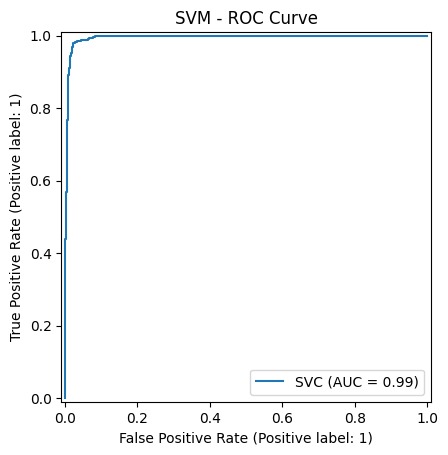

In [290]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(svm, x_test, y_test)
plt.title("SVM - Precision-Recall Curve")
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(svm, x_test, y_test)
plt.title("SVM - ROC Curve")
plt.show()

In [291]:
accuracy_score(y_test,y_pred)

0.9767981438515081

In [292]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.95      0.97      0.96       364

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293

